# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTM2/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh,Rainfall
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429,1.0
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857,41.5
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000,24.0
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000,0.0
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286,0.0


In [3]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [4]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

array([[<Axes: title={'center': 'Flucases'}>,
        <Axes: title={'center': 'Tempave'}>],
       [<Axes: title={'center': 'Rh'}>,
        <Axes: title={'center': 'Holiday'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >]], dtype=object)

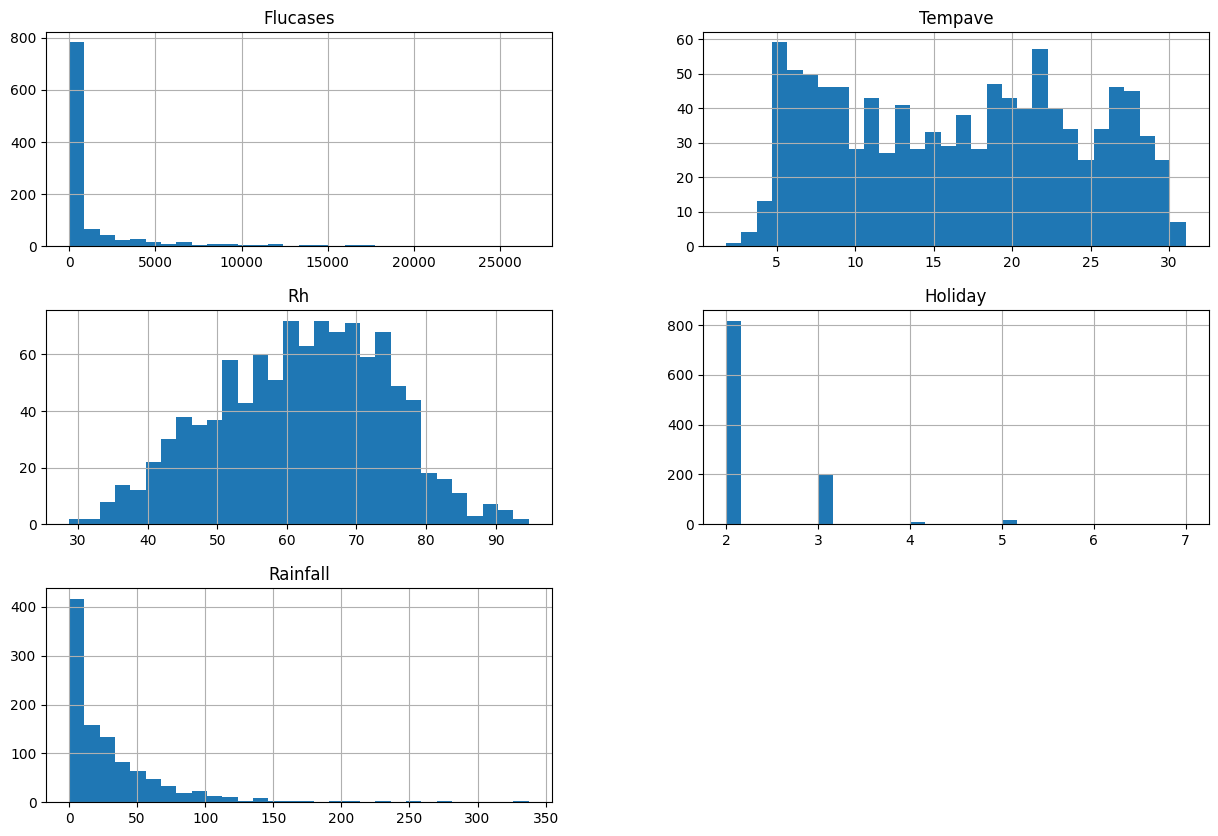

In [5]:
columns = ["Flucases","Tempave", "Rh", "Holiday", "Rainfall"]

all_data = df_tokyo[columns]
all_data.hist(bins=30, figsize=(15, 10))

In [6]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [7]:
train_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
12480,818,9.528571,50.571429,2,1.0
12481,1167,8.642857,61.142857,3,41.5
12482,2562,6.828571,56.000000,2,24.0
12483,3781,5.342857,42.000000,2,0.0
12484,3903,7.214286,38.714286,2,0.0


In [8]:
test_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
13260,3809,5.357143,47.142857,3,6.5
13261,9892,6.285714,38.285714,2,35.5
13262,8198,5.628571,53.857143,3,19.0
13263,9625,6.771429,63.714286,2,31.5
13264,7844,4.228571,49.000000,2,9.0


trainとtestのdfを作る

In [9]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh", "Rainfall"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh", "Rainfall"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [10]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [11]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
data_dir = "datasets/infuluenza/vecLSTMx2/"
exp_dir = "datasets/infuluenza/vecLSTM2/"

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

In [12]:
seq_length = 1

train_Xs = np.load(data_dir + "train_X_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_y_" + str(seq_length) + "w.npy")

In [13]:
train_Xs.shape, train_ys.shape

((779, 1, 5), (779, 1, 5))

In [14]:
train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [15]:
trn_xs_tensor = torch.Tensor(train_Xs[:,:,0:4])
trn_ys_tensor = torch.Tensor(train_ys[:,:,0:4])

val_xs_tensor = torch.Tensor(val_Xs[:,:,0:4])
val_ys_tensor = torch.Tensor(val_ys[:,:,0:4])

In [16]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([623, 1, 4]),
 torch.Size([623, 1, 4]),
 torch.Size([156, 1, 4]),
 torch.Size([156, 1, 4]))

In [17]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [18]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
2 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
3 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
4 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
5 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
6 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
7 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
8 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
9 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
10 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
11 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
12 torch.Size([23, 1, 4]) torch.Size([23, 1, 4])


In [19]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
2 torch.Size([50, 1, 4]) torch.Size([50, 1, 4])
3 torch.Size([6, 1, 4]) torch.Size([6, 1, 4])


# LSTM model

In [20]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size=32, output_size=1, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        h1 = self.relu(self.fc1(outs))
        h2 = self.fc2(h1)
        y_list = [self.relu(h2[:,0:1]), h2[:,1:3], self.relu(h2[:,3:4])]
        ys = torch.cat(y_list, dim=1)

        return ys

In [21]:
model = LSTM(input_size = 4, hidden_size = 32, output_size = 4, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [22]:
batch_0x = list(trn_loader)[0][0]

In [23]:
batch_0x.shape

torch.Size([50, 1, 4])

In [24]:
preds = model(batch_0x)

In [25]:
preds.shape

torch.Size([50, 4])

## Train

In [26]:
model.cuda()

LSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(4, 32, dropout=0.2)
  (fc1): Linear(in_features=32, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [27]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [28]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()

            preds = model(inputs)
            true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [29]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        optimizer.zero_grad()
        
        preds = model(inputs)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9886510280462412 Val loss:  0.6950491592288017
epoch:  1 Train loss:  0.924424212712508 Val loss:  0.6499327272176743
epoch:  2 Train loss:  0.8505223897787241 Val loss:  0.5713879689574242
epoch:  3 Train loss:  0.7096683199589069 Val loss:  0.4476660415530205
epoch:  4 Train loss:  0.5494623161279238 Val loss:  0.3525976277887821
epoch:  5 Train loss:  0.4508821987188779 Val loss:  0.2731827609241009
epoch:  6 Train loss:  0.37203912207713496 Val loss:  0.2557327151298523
epoch:  7 Train loss:  0.3551544638780447 Val loss:  0.24346713721752167
epoch:  8 Train loss:  0.3289797225823769 Val loss:  0.23821620270609856
epoch:  9 Train loss:  0.31147123529360843 Val loss:  0.23041101172566414
epoch:  10 Train loss:  0.3168812428529446 Val loss:  0.23263827338814735
epoch:  11 Train loss:  0.3126881661323401 Val loss:  0.2275503296405077
epoch:  12 Train loss:  0.3066113763130628 Val loss:  0.2257486078888178
epoch:  13 Train loss:  0.3014841033862187 Val loss:  0.

epoch:  112 Train loss:  0.28190316603733945 Val loss:  0.21780538372695446
epoch:  113 Train loss:  0.28202156264048356 Val loss:  0.21192181203514338
epoch:  114 Train loss:  0.28469523099752575 Val loss:  0.2109632370993495
epoch:  115 Train loss:  0.28064488218380856 Val loss:  0.2099897377192974
epoch:  116 Train loss:  0.28897058734527004 Val loss:  0.21163170412182808
epoch:  117 Train loss:  0.2842365973270856 Val loss:  0.21201992873102427
epoch:  118 Train loss:  0.28574952941674453 Val loss:  0.21119223348796368
epoch:  119 Train loss:  0.2815903207430473 Val loss:  0.21224130503833294
epoch:  120 Train loss:  0.28009927845918214 Val loss:  0.20972986053675413
epoch:  121 Train loss:  0.27856506407260895 Val loss:  0.21155901066958904
epoch:  122 Train loss:  0.2820633672750913 Val loss:  0.21179215516895056
epoch:  123 Train loss:  0.2826959387614177 Val loss:  0.20973379258066416
epoch:  124 Train loss:  0.28015827101010543 Val loss:  0.21284737810492516
epoch:  125 Train 

epoch:  227 Train loss:  0.27214747896561253 Val loss:  0.21590948477387428
epoch:  228 Train loss:  0.2730283450621825 Val loss:  0.21345523744821548
epoch:  229 Train loss:  0.2720285046559114 Val loss:  0.21455974876880646
epoch:  230 Train loss:  0.26638364218748534 Val loss:  0.21396492421627045
epoch:  231 Train loss:  0.26674427206699663 Val loss:  0.21392611600458622
epoch:  232 Train loss:  0.26743439069161046 Val loss:  0.2159341685473919
epoch:  233 Train loss:  0.269829293856254 Val loss:  0.21252457238733768
epoch:  234 Train loss:  0.2657215159672957 Val loss:  0.21612656489014626
epoch:  235 Train loss:  0.2742030517413066 Val loss:  0.21272956393659115
epoch:  236 Train loss:  0.27246828147998226 Val loss:  0.21342070400714874
epoch:  237 Train loss:  0.2770609190830818 Val loss:  0.21767499297857285
epoch:  238 Train loss:  0.26300220649975997 Val loss:  0.2150426134467125
epoch:  239 Train loss:  0.26602479127737194 Val loss:  0.2147875539958477
epoch:  240 Train loss

epoch:  340 Train loss:  0.2604608650390918 Val loss:  0.21836093813180923
epoch:  341 Train loss:  0.25972784138642824 Val loss:  0.22794527560472488
epoch:  342 Train loss:  0.2680817957107837 Val loss:  0.21970311179757118
epoch:  343 Train loss:  0.26599330397752613 Val loss:  0.21722077205777168
epoch:  344 Train loss:  0.2567025629373697 Val loss:  0.218570526689291
epoch:  345 Train loss:  0.259614314024265 Val loss:  0.2185027115046978
epoch:  346 Train loss:  0.2577722198688067 Val loss:  0.21819086745381355
epoch:  347 Train loss:  0.2581288138261208 Val loss:  0.21793584898114204
epoch:  348 Train loss:  0.258229774924425 Val loss:  0.21939558535814285
epoch:  349 Train loss:  0.25471315590234905 Val loss:  0.21660780161619186
epoch:  350 Train loss:  0.2619724480005411 Val loss:  0.22152745723724365
epoch:  351 Train loss:  0.25614599883556366 Val loss:  0.21832667849957943
epoch:  352 Train loss:  0.25497163373690385 Val loss:  0.21862952411174774
epoch:  353 Train loss:  

epoch:  451 Train loss:  0.24723122784724602 Val loss:  0.22091291472315788
epoch:  452 Train loss:  0.2582637266470836 Val loss:  0.22210229746997356
epoch:  453 Train loss:  0.24591756440125978 Val loss:  0.2234425786882639
epoch:  454 Train loss:  0.24450331926345825 Val loss:  0.2202165350317955
epoch:  455 Train loss:  0.24271022356473482 Val loss:  0.219391118735075
epoch:  456 Train loss:  0.2422194114098182 Val loss:  0.22630367800593376
epoch:  457 Train loss:  0.24991529606855833 Val loss:  0.2206702083349228
epoch:  458 Train loss:  0.24194509364091432 Val loss:  0.22534636408090591
epoch:  459 Train loss:  0.24307947204663202 Val loss:  0.22204861044883728
epoch:  460 Train loss:  0.24201367451594427 Val loss:  0.21852478757500648
epoch:  461 Train loss:  0.2511140371744449 Val loss:  0.22262463346123695
epoch:  462 Train loss:  0.24636427370401529 Val loss:  0.22204488143324852
epoch:  463 Train loss:  0.2449748688019239 Val loss:  0.2182152085006237
epoch:  464 Train loss

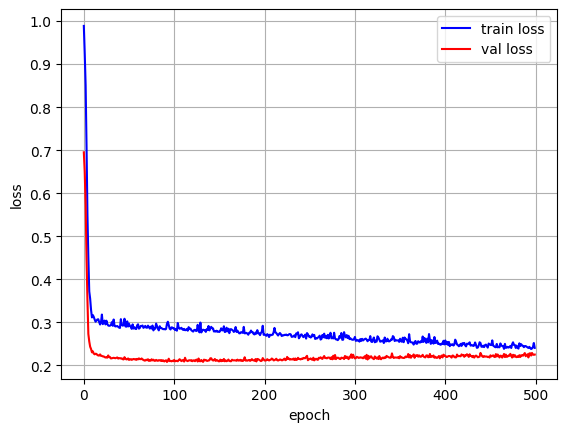

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [31]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(92, 0.20812694169580936)

In [22]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [23]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [24]:
np.array(trues_list).shape, np.array(preds_list).shape

((623, 1, 4), (623, 1, 4))

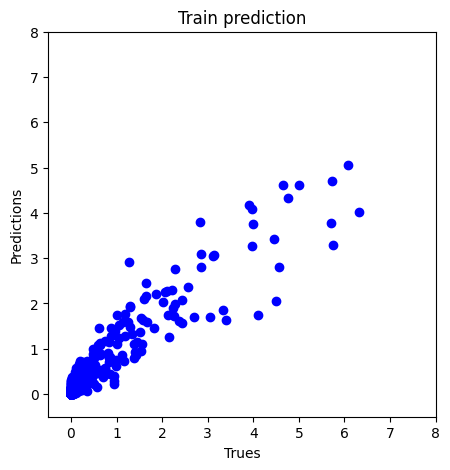

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

In [26]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


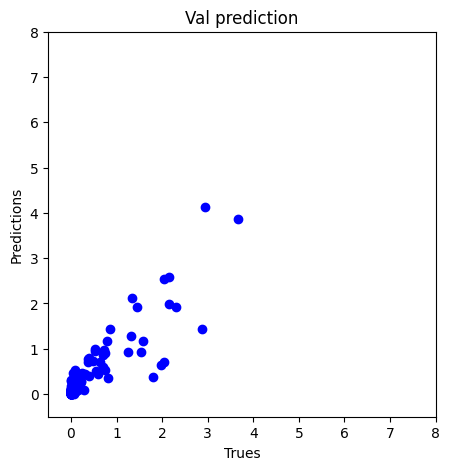

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

## Test prediction

In [28]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(data_dir + "train_np.npy")
test_np = np.load(data_dir + "test_np.npy")

In [29]:
train_np.shape, test_np.shape

((780, 5), (260, 5))

In [30]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [31]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [32]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 500

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 10

test_scaled_zs = (np.array(test_np[:,3]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [33]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
test_scaled_ys.shape, test_scaled_zs.reshape(-1,1).shape, test_scaled_ts.reshape(-1,1).shape, test_np.shape

((260, 2), (260, 1), (260, 1), (260, 5))

In [35]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_scaled_zs.reshape(-1,1), test_np[:,-1].reshape(-1,1)], axis = 1)

In [36]:
test_all_np.shape

(260, 5)

In [37]:
test_np.shape

(260, 5)

### 1. Prediction based on results from 40 days ago

In [38]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [39]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [40]:
test_Xs.shape, test_ys.shape

((259, 1, 5), (259, 1, 5))

In [41]:
tst_xs_tensor = torch.Tensor(test_Xs[:,:,0:4])
tst_ys_tensor = torch.Tensor(test_ys[:,:,0:4])

In [42]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [43]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


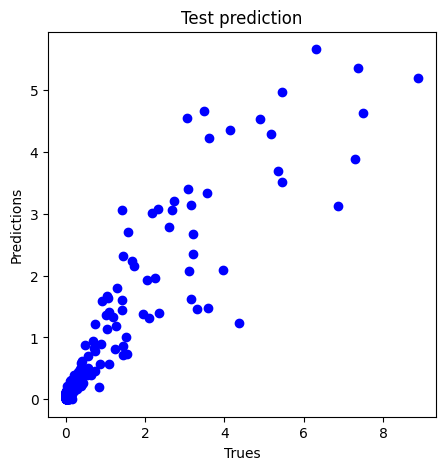

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [45]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [46]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

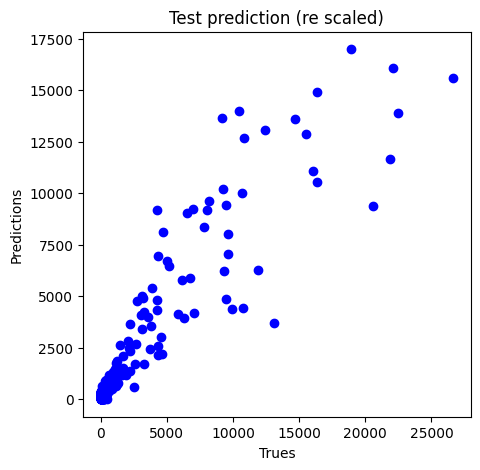

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [48]:
tst_preds.shape

(259, 1)

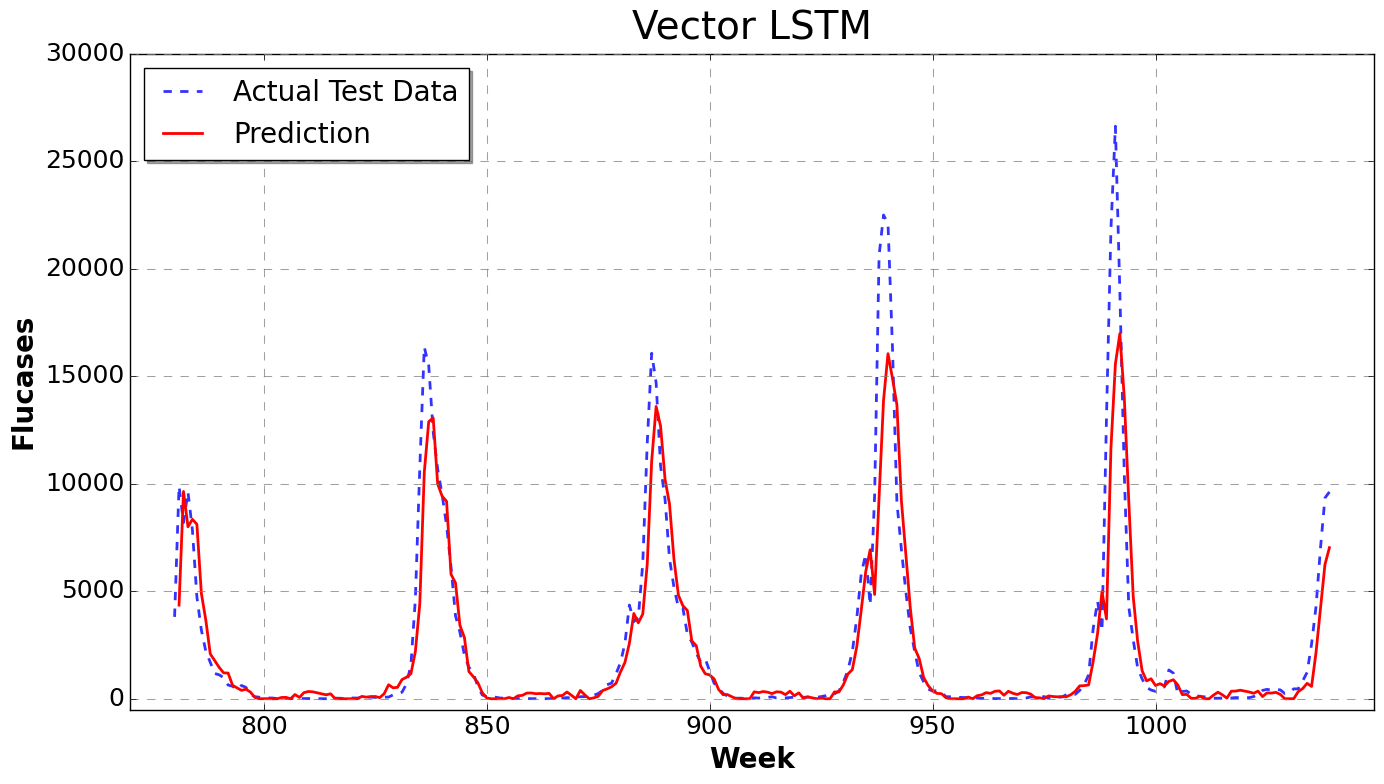

In [49]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Vector LSTM", fontsize=28, pad=10)

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
#plt.savefig("Flucases Prediction (vec LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [50]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [51]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3629956.9302754602.
RMSE : 1905.2445854208484.
MAE : 807.0479514423945.
R2 : 0.8263586460684812.
pearson : 0.9200800969001541 1.349331980418999e-106


In [52]:
reg_metric(test_np[seq_length*52:,0], tst_preds[seq_length*51:,0], "Flucases")

Flucases
MSE : 4257786.603774765.
RMSE : 2063.4404774004906.
MAE : 894.3833884218565.
R2 : 0.8234256932545911.
pearson : 0.9213548201077784 1.759904490700595e-86
